<a href="https://colab.research.google.com/github/sonG1031/ML_DL_STUDY/blob/main/%5BML%5D%EC%84%A0%ED%98%95_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 데이터 준비

import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])

# 회귀 문제 이므로 perch_weight가 target으로 쓰임.
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [2]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
train_input = train_input.reshape(-1, 1) # 2차원 배열로 변경
test_input = test_input.reshape(-1, 1)

In [3]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input,train_target)

KNeighborsRegressor(n_neighbors=3)

In [4]:
print(knr.predict([[50]])) # 기댓값 : 1500

[1033.33333333]


왜 기댓값보다 작은 값으로 예측되는 걸까?

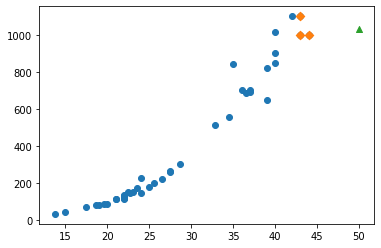

In [5]:
import matplotlib.pyplot as plt

distances, indexes = knr.kneighbors([[50]])
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D') # k개의 이웃
plt.scatter(50, 1033, marker='^') # 예측값

plt.show()

In [7]:
print(np.mean(train_target[indexes]))
# 훈련 세트의 범위를 벗어나자 값이 바뀌지 않음.
print(knr.predict([[50]]))
print(knr.predict([[100]]))  

1033.3333333333333
[1033.33333333]
[1033.33333333]


k-최근접 이웃 회귀는 가장 가까운 샘플을 찾아 타깃을 평균한다.  
따라서 새로운 샘플이 훈련 세트의 범위를 벗어나면 엉뚱한 값을 예측할 수 있다.  

# 선형 회귀
- 특성과 타겟 사이의 관계를 가장 잘 나타내는 선형 방정식을 찾음.
    - 그말은 즉 최적의 기울기와 절편을 구한다는 의미
- 훈련 세트를 벗어난 범위의 데이터도 잘 예측함.
- 선형 회귀가 찾은 특성과 타겟 사이의 관계는 선형 방정식의 **계수** 또는 **가중치**에 저장됨.
    - 종종 가중치는 방정식의 기울기와 절편을 모두 의미하는 경우가 많음.

In [8]:
from sklearn.linear_model import LinearRegression # fit_intercept 매개변수를 False로 지정하면 절편을 학습하지 않음.

lr = LinearRegression()
# 데이터의 특성이 하나 이므로 직선의 방정식을 학습함.
lr.fit(train_input, train_target)  

print(lr.predict([[50]]))

[1241.83860323]


In [9]:
print(lr.coef_, lr.intercept_) # 직선의 기울기, y절편

[39.01714496] -709.0186449535477


머신러닝에서 기울기를 종종 계수(coefficient) 또는 가중치(weight)라고 부름.

# 모델 파라미터
- 머신러닝 모델이 특성에서 학습한 파라미터

coef_와 intercept_를 머신러닝 알고리즘이 찾은 값이라는 의미로  
**모델 파라미터(model parameter)**라고 부름.  
많은 머신러닝 알고리즘의 훈련 과정은 최적의 모델 파라미터를 찾는 것과 같음.  
그리고 이를 **모델 기반 학습**이라고 부름. 그런데 k-최근접 이웃에는 모델 파라미터가 없다.  
k-최근접 이웃처럼 훈련 세트를 저장하는 것이 훈련의 전부인 것을 **사례 기반 학습**이라고 부름.

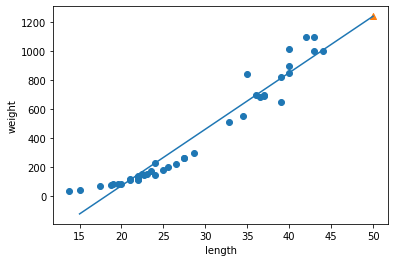

In [10]:
# 학습한 직선 그리기

plt.scatter(train_input, train_target)
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

훈련 세트 범위를 벗어나도 예측할 수 있음.

In [11]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


# 다항 회귀
- 다항식을 사용한 선형 회귀
- 다항식을 사용하여 특성과 타겟 사이의 관계를 나타냄.
- 이 함수는 비선형일 수 있지만 여전히 선형 회귀로 표현 가능함.

### 문제점  
- 테스트 세트 점수와 훈련 세트 점수를 보면
전체적으로 과소적합되었음.
- 그래프를 확인해보면 선형 회귀가 만든 직선이 왼쪽 아래로 쭉 뻗어 있음.  
이 직선대로 예측하게 되면 무게가 음수로 예측됨. 즉, 말이 안됨. 

### 해결방안
- 최적의 직선이 아닌 최적의 곡선을 찾자.  
즉, 2차 방정식의 그래프를 그려야하므로 제곱항을 훈련 세트에 추가
    - 이렇게 다항식을 사용한 선형 회귀를 다항 회귀라고 부름.

In [12]:
# 넘파이 브로드캐스팅을 사용하여 제곱항 배열을 만들고 
# np.column_stack을 사용하여 열방향으로 합침.
train_poly = np.column_stack((train_input ** 2, train_input)) 
test_poly = np.column_stack((test_input ** 2, test_input))

In [13]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [15]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
# 학습할때 제곱항을 추가했기 때문에 예측할때도 제곱항을 추가
print(lr.predict([[50**2, 50]])) 

[1573.98423528]


In [16]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


무게 = 1.01 x 길이^2 -21.6 x 길이 + 116.05

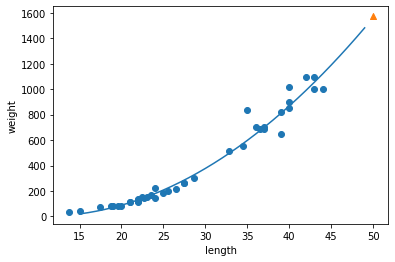

In [17]:
# 곡선을 그리기 위해 구간별로 짧은 직선을 그려야함.
point = np.arange(15, 50) 

plt.scatter(train_input, train_target)
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

plt.scatter(50, 1574, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [18]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


R^2의 점수가 크게 높아짐.  
하지만 여전히 테스트 세트의 점수가 좀 더 높음. 과소적합이 약간 남음.  
따라서 조금 더 복잡한 모델이 필요함.